In [99]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
from myUtils import *

# rootPath = "../../results/scenario/geothermal"
# rootPath = "../../results/scenario/biogas"
# rootPath = "../../results/scenario/PHS"
rootPath = "../../results/scenario/PHS"



plt.style.use('bmh')
%matplotlib inline

# nBase = pypsa.Network("../../results/base/base27Node2045/postnetworks/base_s_27_lvopt_3H_3H_2045.nc")
# nMean = pypsa.Network(rootPath + "-mean/postnetworks/base_s_27_lvopt_3H_3H_2045.nc")
# nOptimist = pypsa.Network(rootPath + "-optimist/postnetworks/base_s_27_lvopt_3H_3H_2045.nc")
n = pypsa.Network(rootPath + "/postnetworks/base_s_27_lvopt_3H_3H_2045.nc")



INFO:pypsa.io:Imported network base_s_27_lvopt_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


```
1 kW= 1e3 W               1 KWH = 1e3 WH             1 Tsd EUR = 1e3 EUR
1 MW = 1e6 W = 1 MW       1 MWH = 1e6 WH = 1 MWH     1 Mio.EUR = 1e6 EUR
1 GW = 1e9 W = 1e3 MW     1 GWH = 1e9 WH = 1e3 MWH   1 Mrd.EUR = 1e9 EUR
1 TW = 1e12 W = 1e6 MW    1 TWH = 1e12 WH = 1e6 MWH  1 Bio.EUR = 1e12 EUR


```

/var/folders/v7/3zkz2x8x0gg0zyw7txxpwk380000gn/T/ipykernel_41875/978361757.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storeStoreDf[storeStoreDf<0]=0
/var/folders/v7/3zkz2x8x0gg0zyw7txxpwk380000gn/T/ipykernel_41875/978361757.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storeStoreDf[storeStoreDf<0]=0
/var/folders/v7/3zkz2x8x0gg0zyw7txxpwk380000gn/T/ipykernel_41875/978361757.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<Axes: xlabel='snapshot'>

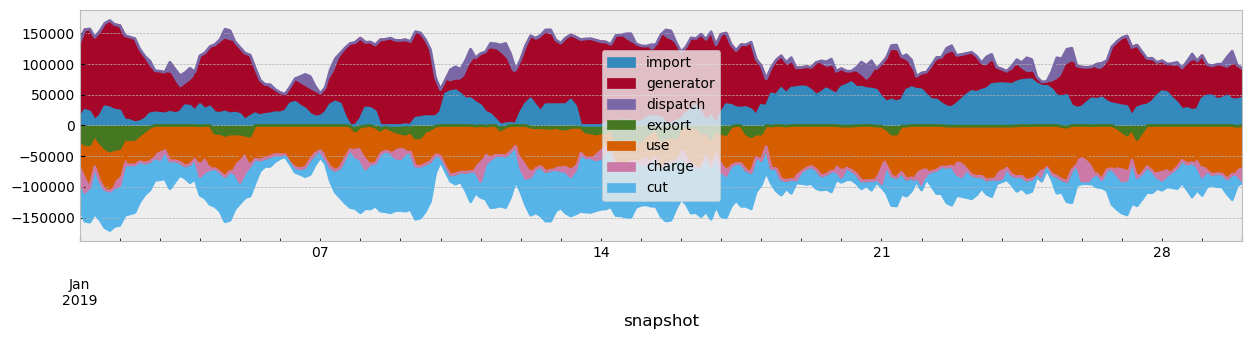

In [101]:
assignGrouper(pypsa)


df = pd.DataFrame(index = n.snapshots)

importLinkIds = de_import_elec_grouper(n, 'Link').tolist()
importLineIds = de_import_elec_grouper(n, 'Line').tolist()
importLineDf = n.lines_t.p0[importLineIds].sum(axis=1)
importLineDf[importLineDf < 0] = 0

df['import'] = n.links_t.p0[importLinkIds].sum(axis=1) \
  + importLineDf

generatorGeneratorIds =  de_generator_grouper(n, 'Generator').tolist()
generatorLinkIds =  de_generator_grouper(n, 'Link').tolist()
df['generator'] =  n.generators_t.p[generatorGeneratorIds].sum(axis=1) \
  + n.links_t.p1[generatorLinkIds].abs().sum(axis=1)

storeStorageIds = de_elec_store_grouper(n, 'StorageUnit').tolist()
storeStoreIds = de_elec_store_grouper(n, 'Store').tolist()
storeStoreDf =n.stores_t.p[storeStoreIds].clip(lower=0)


# df['dispatch'] = n.storage_units_t.p_dispatch[storeStorageIds].sum(axis=1) \
#   + storeStoreDf.sum(axis=1)


# # use
# exportLinkIds = de_export_elec_grouper(n, 'Link').tolist()
# exportLinIds = de_export_elec_grouper(n, 'Line').tolist()
# exportLineDf = n.lines_t.p0[exportLinIds].sum(axis=1)
# exportLineDf[exportLineDf<0]=0
# df['export'] = - n.links_t.p0[exportLinkIds].sum(axis=1) \
#   - exportLineDf


# useLinkIds = de_elec_use_grouper(n, 'Link').tolist()
# useLoadIds = de_elec_use_grouper(n, 'Load').tolist()
# df['use'] = n.links_t.p1[importLinkIds].abs().sum(axis=1) \
#   + n.loads_t.p[useLoadIds].sum(axis=1)
# df['use'] = - df['use']

# storeStorageIds = de_elec_store_grouper(n, 'StorageUnit').tolist()
# storeStoreIds = de_elec_store_grouper(n, 'Store').tolist()
# storeStoreDf =n.stores_t.p[storeStoreIds]
# storeStoreDf[storeStoreDf>0]=0
# storeStoreDf
# df['charge'] = n.storage_units_t.p_store[storeStorageIds].sum(axis=1)\
#   + storeStoreDf.abs().sum(axis=1)
# df['charge'] = - df['charge']


# total_use = (df['export'] + df['use'] + df['charge'])
# total_produce= (df['import'] + df['generator'] + df['dispatch'])

# df['cut'] = total_use + total_produce
# df['cut'][df['cut']<0]=0
# df['cut'] = - df['cut']


# df['2019-01-01 00:00:00': '2019-1-30 00:00:00'].plot(kind='area', figsize=(15,3))

In [97]:
n.lines_t.p0

Line
snapshot
2019-01-01 00:00:00
2019-01-01 03:00:00
2019-01-01 06:00:00
2019-01-01 09:00:00
2019-01-01 12:00:00
2019-01-01 15:00:00
2019-01-01 18:00:00
2019-01-01 21:00:00
2019-01-02 00:00:00


In [76]:
n.statistics.supply(groupby="de_generator_grouper").sum()/1e6

590.35731923203

In [77]:
def de_export_elec_grouper(n,c):
  if (c == 'Line'):
    dfLine = n.df(c)
    return dfLine[(dfLine['bus0'].str.startswith('DE0')) 
                  & (~(dfLine['bus1'].str.startswith('DE0')))].index.to_series()
  
  if (c == 'Link'):
    dfLink = n.df(c)
    return dfLink[(dfLink['bus0'].str.startswith('DE0')) 
                  & (dfLink['carrier'] == 'DC')  
                  & (~(dfLink['bus1'].str.startswith('DE0')))].index.to_series()

  return pd.Index([]).to_series()
pypsa.statistics.groupers.add_grouper("de_export_elec_grouper", de_export_elec_grouper)


In [78]:
def de_export_elec_grouper(n,c):
  if (c == 'Line'):
    dfLine = n.df(c)
    return dfLine[(dfLine['bus0'].str.startswith('DE0')) 
                  & (~(dfLine['bus1'].str.startswith('DE0'))) ].index.to_series()
  
  if (c == 'Link'):
    dfLink = n.df(c)
    return dfLink[(dfLink['bus0'].str.startswith('DE0')) 
                  & (dfLink['carrier'] == 'DC')  
                  & (~(dfLink['bus1'].str.startswith('DE0')))].index.to_series()

In [85]:
n.links.loc['DE0 0 battery charger']

bus0                                 DE0 0
bus1                         DE0 0 battery
type                                      
carrier                    battery charger
efficiency                         1.00000
active                                True
build_year                               0
lifetime                          10.00000
p_nom                              0.00000
p_nom_mod                          0.00000
p_nom_extendable                      True
p_nom_min                          0.00000
p_nom_max                              inf
p_set                              0.00000
p_min_pu                           0.00000
p_max_pu                           1.00000
capital_cost                   32964.91193
marginal_cost                      0.00000
marginal_cost_quadratic            0.00000
stand_by_cost                      0.00000
length                             0.00000
terrain_factor                     1.00000
committable                          False
start_up_co